In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mp
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin,accuracy_score,silhouette_score,confusion_matrix,classification_report

In [70]:
class fuzzy:
    
    def __init__(self,k=2):
        self.k = k
    
        
    def initial_wt(self,k,x_train):
        weight=np.random.RandomState(2).dirichlet(np.ones(k),size=len(self.x_train))
        weight_arr=np.array(weight)

        return weight_arr

    def labels_allot(self,x_train,centroid):
        self.labels = pairwise_distances_argmin(x_train,centroid)
        return self.labels

    def centroids(self,x_train,weight,m=2):
        centroid=[]
        self.centroid=centroid
        for i in range(self.k):
            cent=[]
            for j in range(len(x_train[0])):
                num = np.sum(x_train[:,j]*(weight[:,i]**m))
                deno = np.sum(weight[:,i]**m)
                cordinate = num/deno
                cent.append(np.trunc(cordinate*10) / 10)
            centroid.append(cent)

        return centroid

    def distance(self,x_train,centroid):
        distance=[]
        for i in range(len(x_train)):
            dis=[]
            for j in centroid:
                euc=mp.dist(x_train[i],j)
                dis.append(np.trunc(euc*100)/100)
            distance.append(dis)

        return distance

    def new_wt(self,distance,m=2):
        weight=[]
        for i in distance:
            wt=[]
            for j in range(len(distance[0])):
                i=np.array(i)
                num=1/(i[j])
                deno=np.sum(1/i)
                wt.append(np.round((num/deno),2))    
            weight.append(wt)

        return np.array(weight)
    
    def fit(self,x_train):
        x_train=x_train.to_numpy()
        self.x_train = x_train
        visual_cent = []
        visual_label = []
        
        
        initial_wt=self.initial_wt(self.k,x_train)
        initial_cent=self.centroids(x_train,initial_wt)
        cent=initial_cent
        
        visual_cent.append(cent)
        labels = self.labels_allot(x_train,cent)
        visual_label.append(labels)
        
        count=0
        while (count<100):
            new_w=self.new_wt(self.distance(x_train,cent))
            new_cent=self.centroids(x_train,new_w)
            visual_cent.append(new_cent)
            labels = self.labels_allot(x_train,new_cent)
            visual_label.append(labels)
            if cent==new_cent:
                break
            else:
                cent=new_cent
                count+=1
        
        self.visual = visual_cent
        self.visual_lab = visual_label
             
                
    def visualization(self):
        # for k=2 only and only for two features
        centroid = self.visual
        x_train = self.x_train
        labels=np.array(self.visual_lab)
        centroid=np.array(centroid)
        
        print("initial centroids : ")
        print(centroid[0])
        plt.title("Initial Centoids")
        sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=labels[0])
        sns.scatterplot(x=centroid[0][:,0], y=centroid[0][:,1],marker="*",hue=[0,1],s=200)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
        for i in range(1,len(centroid)):
                print("updated centroids : ")
                print(centroid[i])
                plt.title("Centoids after {} iteration".format(i))
                
                sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=labels[i])
                sns.scatterplot(x=centroid[i][:,0], y=centroid[i][:,1],marker="*",hue=[0,1],s=200)
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                plt.legend()
                plt.show()       


In [71]:
from sklearn import datasets


In [72]:
x,y=datasets.make_blobs(n_samples=500, centers=None, n_features=2,random_state=0)

In [73]:
df=pd.DataFrame(x,columns=["Feature1","Feature2"])
data=df.copy()
data["Target"]=y
data[["Feature1","Feature2"]]

,Feature1,Feature2
0,1.103182,4.705777
1,-1.932846,3.642251
2,-2.034422,1.866002
3,1.616402,2.686831
4,-0.960010,4.492566
...,...,...
495,2.660388,1.793220
496,2.875589,2.257612
497,2.826673,1.927102
498,-0.094483,5.358239


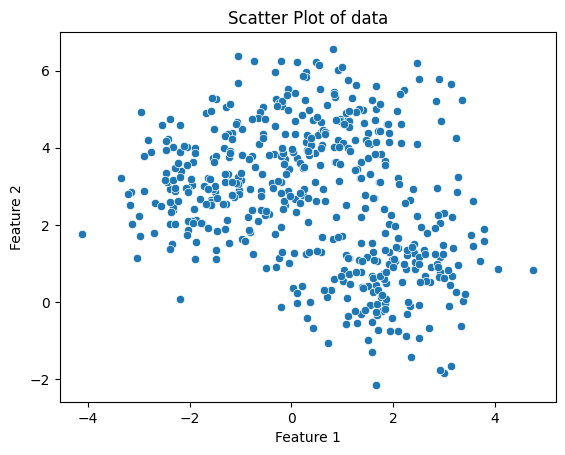

In [74]:
plt.title("Scatter Plot of data")
sns.scatterplot(x=x[:,0],y=x[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [75]:
df=pd.DataFrame()

In [76]:
df["X"]=[1,2,3,4,5,6]
df["Y"]=[6,5,8,4,7,9]
df

,X,Y
0,1,6
1,2,5
2,3,8
3,4,4
4,5,7
5,6,9


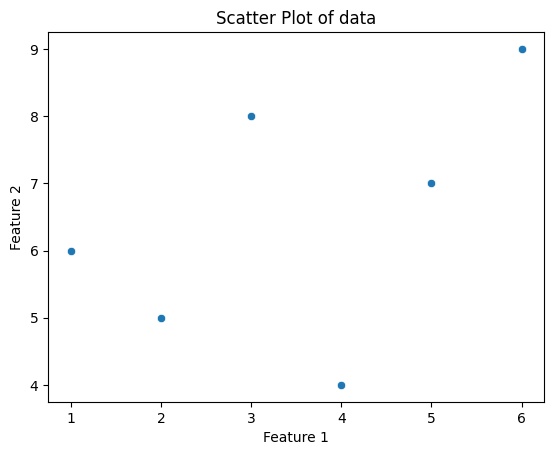

In [77]:
plt.title("Scatter Plot of data")
sns.scatterplot(x=df["X"].values,y=df["Y"].values)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [78]:
fz=fuzzy(k=2)

In [79]:
fz.fit(df[["X","Y"]])

initial centroids : 
[[2.7 6.6]
 [4.  5.7]]


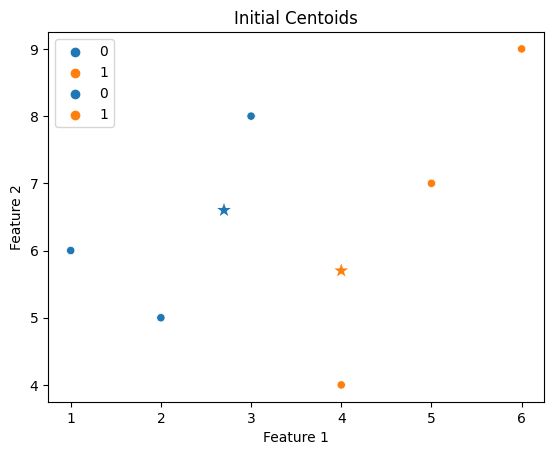

updated centroids : 
[[3.  6.6]
 [3.9 6.2]]


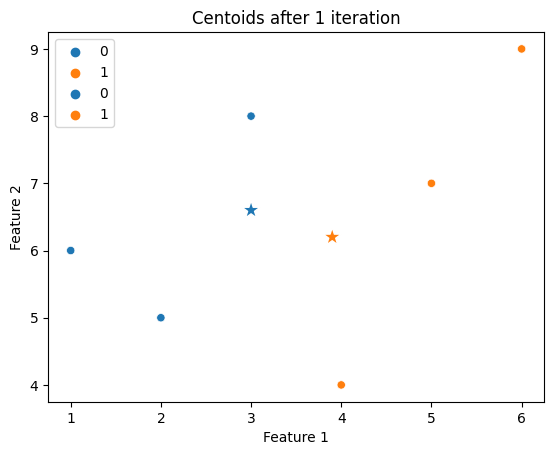

updated centroids : 
[[3.1 6.5]
 [3.8 6.4]]


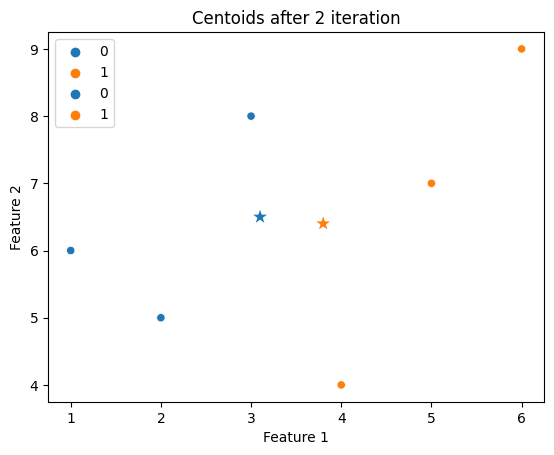

updated centroids : 
[[3.1 6.4]
 [3.8 6.5]]


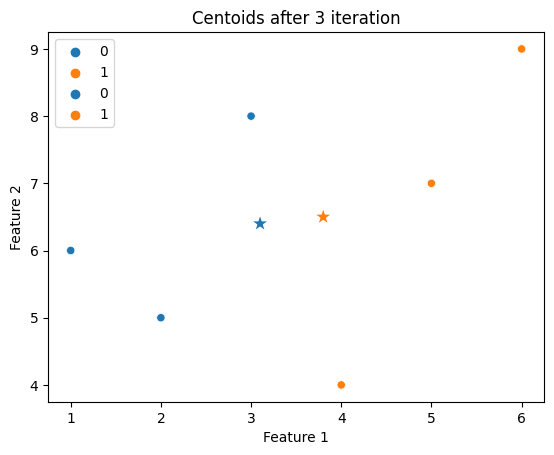

updated centroids : 
[[3.1 6.3]
 [3.8 6.6]]


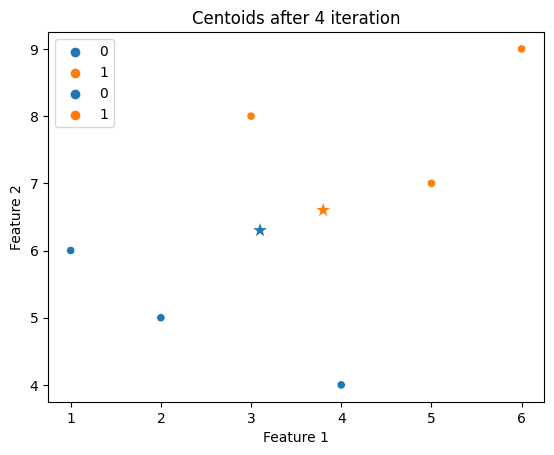

updated centroids : 
[[3.1 6.2]
 [3.8 6.7]]


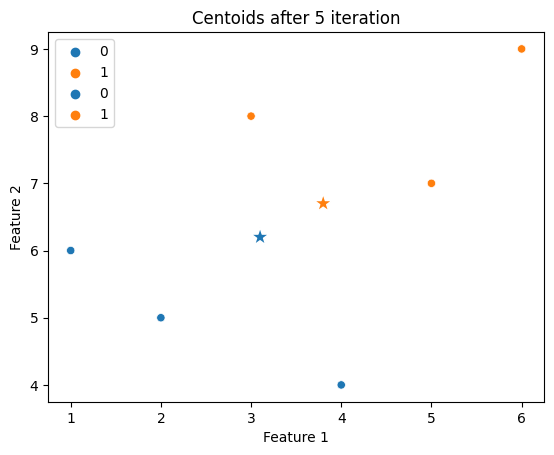

updated centroids : 
[[3.  6.1]
 [3.9 6.8]]


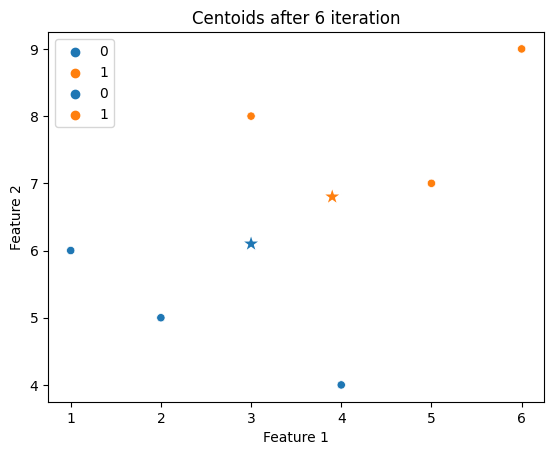

updated centroids : 
[[2.9 6. ]
 [4.  6.9]]


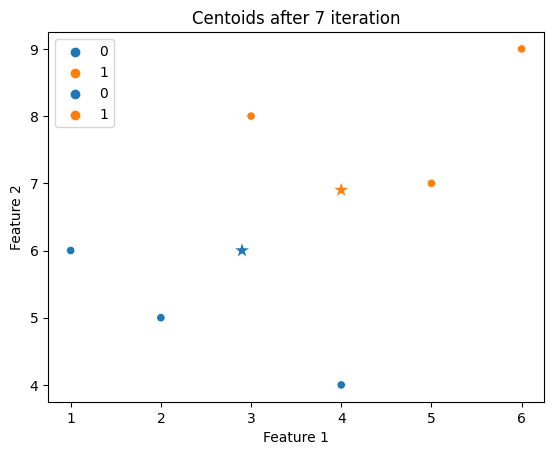

updated centroids : 
[[2.8 5.9]
 [4.1 7. ]]


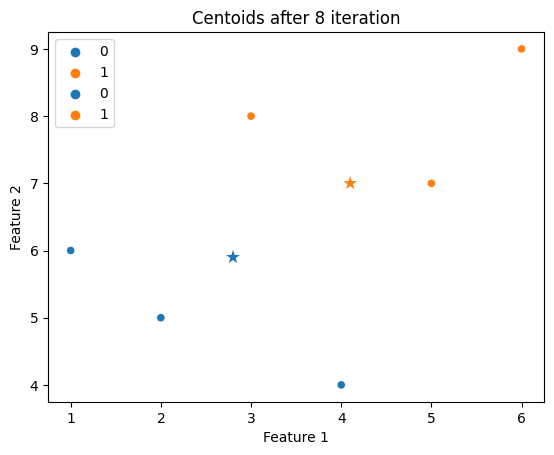

updated centroids : 
[[2.7 5.8]
 [4.2 7.1]]


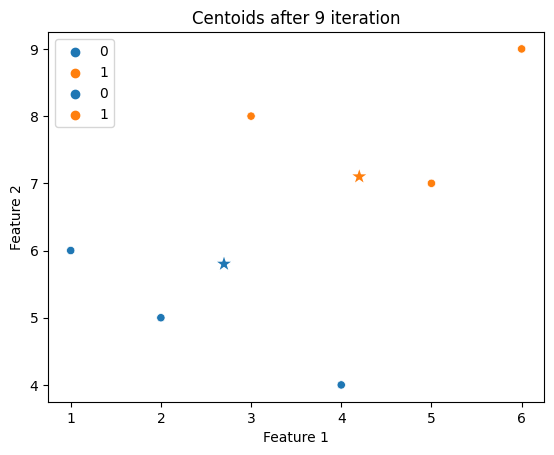

updated centroids : 
[[2.6 5.7]
 [4.3 7.2]]


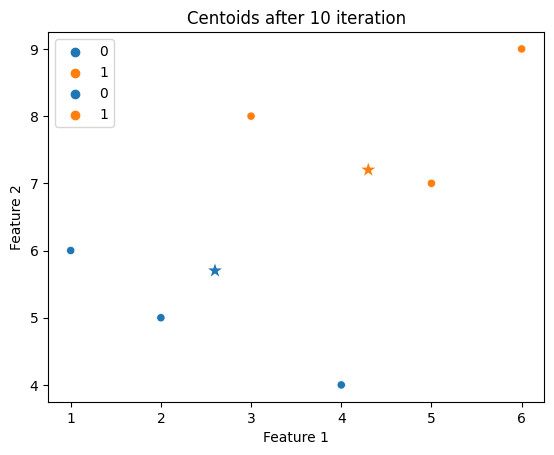

updated centroids : 
[[2.5 5.6]
 [4.4 7.3]]


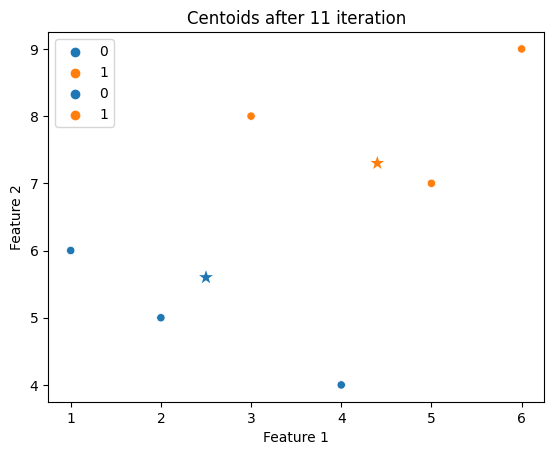

updated centroids : 
[[2.5 5.5]
 [4.4 7.3]]


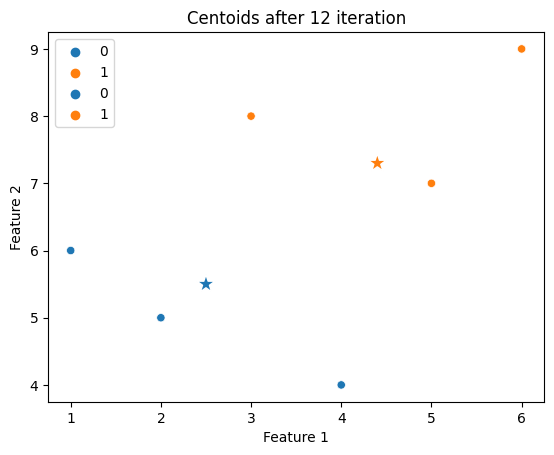

updated centroids : 
[[2.4 5.5]
 [4.4 7.3]]


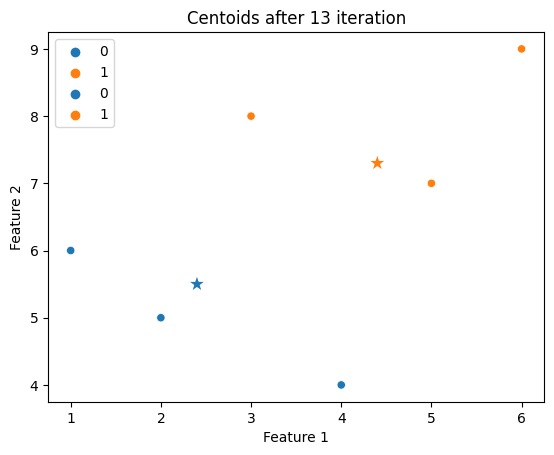

updated centroids : 
[[2.4 5.5]
 [4.5 7.3]]


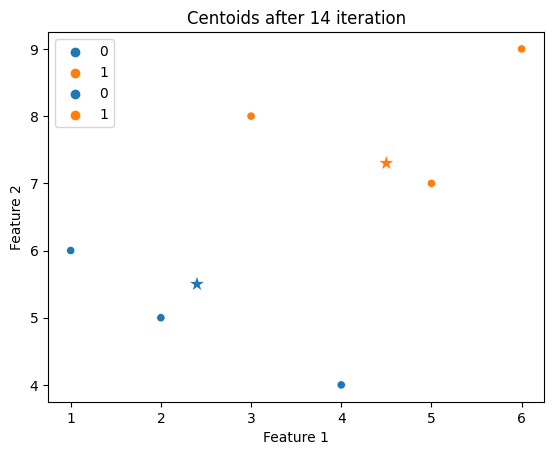

updated centroids : 
[[2.4 5.5]
 [4.5 7.3]]


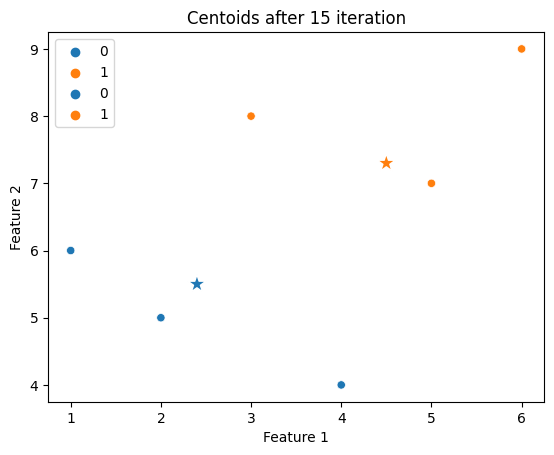

In [80]:
fz.visualization()